# COVID Cases, Hospitalizations, and Deaths by Age, Sex, Race, and Date.
#### Data acquired from [opendataphilly.org](https://www.opendataphilly.org).
#### Coding & Analysis: Lawrence Love
* Notebook last updated 11/20/2020
    * Removed all cells reading in CSVs and replace with API calls
    * Using API changed the representation of dates which required regex to clean
    * Final corrections for better plotting and code readability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import json
import requests
import re

In [2]:
# Cases by Age
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_age'
response = requests.request("GET", url)
cases_age = pd.json_normalize(response.json()['rows'])

In [3]:
# Cases by Sex
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_sex'
response = requests.request("GET", url)
cases_sex = pd.json_normalize(response.json()['rows'])

In [4]:
# Hospitalizations by Age
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_age'
response = requests.request("GET", url)
hosp_age = pd.json_normalize(response.json()['rows'])

In [5]:
# Hospitalizations by Sex
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_sex'
response = requests.request("GET", url)
hosp_sex = pd.json_normalize(response.json()['rows'])

In [6]:
# Deaths by Age
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_deaths_by_age'
response = requests.request("GET", url)
deaths_age = pd.json_normalize(response.json()['rows'])

In [7]:
# Cases by Race
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_race'
response = requests.request("GET", url)
cases_race = pd.json_normalize(response.json()['rows'])

In [8]:
# Hospitalizations by Race
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_race'
response = requests.request("GET", url)
hosp_race = pd.json_normalize(response.json()['rows'])

In [9]:
# Deaths by Race
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_deaths_by_race'
response = requests.request("GET", url)
deaths_race = pd.json_normalize(response.json()['rows'])

In [10]:
# Cases by Date
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_date'
response = requests.request("GET", url)
cases_date = pd.json_normalize(response.json()['rows'])

In [11]:
# Hospitalizations by Date
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_date'
response = requests.request("GET", url)
hosp_date = pd.json_normalize(response.json()['rows'])

In [12]:
# Deaths by Date
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_deaths_by_date'
response = requests.request("GET", url)
deaths_date = pd.json_normalize(response.json()['rows'])

## Cases by Age/Sex

In [13]:
cases_age

,cartodb_id,the_geom,the_geom_webmercator,age,count,etl_timestamp
0,1,None,None,20-34,18286,2020-11-20T18:20:02Z
1,2,None,None,55-74,12938,2020-11-20T18:20:02Z
2,3,None,None,75+,4418,2020-11-20T18:20:02Z
3,4,None,None,<20,5838,2020-11-20T18:20:02Z
4,5,None,None,35-54,17571,2020-11-20T18:20:02Z


In [14]:
# Reorder the ages youngest to oldest
cases_age = cases_age.loc[[3, 0, 4, 1, 2], :]

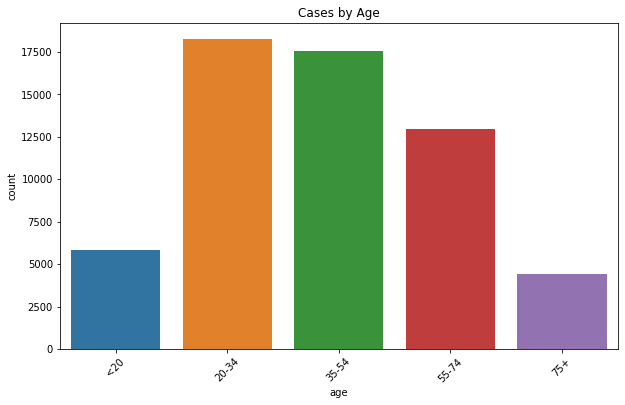

In [15]:
ages = [i for i in cases_age['age']]
plt.figure(figsize=(10,6))
plt.title('Cases by Age')
case_age_plot = sns.barplot(x='age', y='count', data=cases_age)
case_age_plot.set_xticklabels(ages, rotation=45)
plt.show()

In [16]:
cases_sex

,cartodb_id,the_geom,the_geom_webmercator,sex,count,etl_timestamp
0,1,None,None,Female,32276,2020-11-20T18:20:02Z
1,2,None,None,Male,26485,2020-11-20T18:20:02Z
2,3,None,None,UNKNOWN,320,2020-11-20T18:20:02Z


In [17]:
# Make 'UNKNOWN' casing consistent with other responses
cases_sex.loc[cases_sex['sex'] == 'UNKNOWN', ['sex']] = 'Unknown'

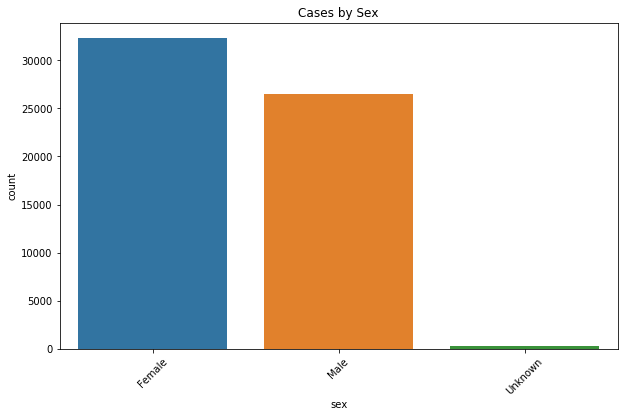

In [18]:
sexes = [i for i in cases_sex['sex']]
plt.figure(figsize=(10,6))
plt.title('Cases by Sex')
case_sex_plot = sns.barplot(x='sex', y='count', data=cases_sex)
case_sex_plot.set_xticklabels(sexes, rotation=45)
plt.show()

## Hospitalizations by Age/Sex

In [19]:
hosp_age

,cartodb_id,the_geom,the_geom_webmercator,age,hospitalized,count,etl_timestamp
0,1,None,None,<20,Yes,154,2020-11-20T18:20:02Z
1,2,None,None,75+,NO_UNKNOWN,2541,2020-11-20T18:20:02Z
2,3,None,None,<20,NO_UNKNOWN,5684,2020-11-20T18:20:02Z
3,4,None,None,55-74,NO_UNKNOWN,9580,2020-11-20T18:20:02Z
4,5,None,None,35-54,NO_UNKNOWN,15655,2020-11-20T18:20:02Z
5,6,None,None,55-74,Yes,3358,2020-11-20T18:20:02Z
6,7,None,None,20-34,NO_UNKNOWN,17395,2020-11-20T18:20:02Z
7,8,None,None,20-34,Yes,891,2020-11-20T18:20:02Z
8,9,None,None,35-54,Yes,1916,2020-11-20T18:20:02Z
9,10,None,None,75+,Yes,1877,2020-11-20T18:20:02Z


In [20]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_age.loc[hosp_age['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

In [21]:
# Set and reorder ages younges to oldest
ages_order = ['<20', '20-34', '35-54', '55-74', '75+']
hosp_age['age'] = pd.Categorical(hosp_age['age'], categories=ages_order, ordered=True)

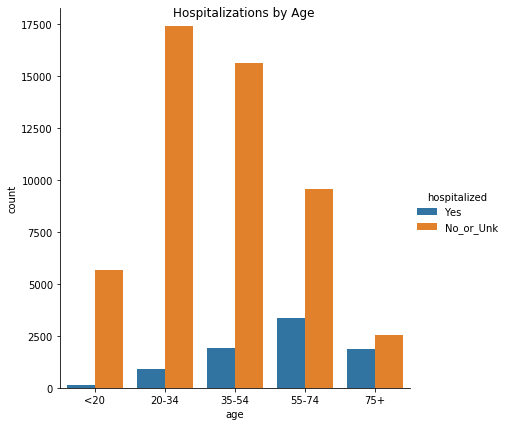

In [22]:
hosp_age_plot = sns.catplot(x = "age", y = "count", hue = "hospitalized", data=hosp_age, kind = "bar", height=6)
hosp_age_plot.fig.suptitle('Hospitalizations by Age')
plt.show()

In [23]:
hosp_sex

,cartodb_id,the_geom,the_geom_webmercator,sex,hospitalized,count,etl_timestamp
0,1,None,None,Female,Yes,4078,2020-11-20T18:20:02Z
1,2,None,None,Male,Yes,4120,2020-11-20T18:20:02Z
2,3,None,None,Female,NO_UNKNOWN,28198,2020-11-20T18:20:02Z
3,4,None,None,Male,NO_UNKNOWN,22365,2020-11-20T18:20:02Z


In [24]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_sex.loc[hosp_sex['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

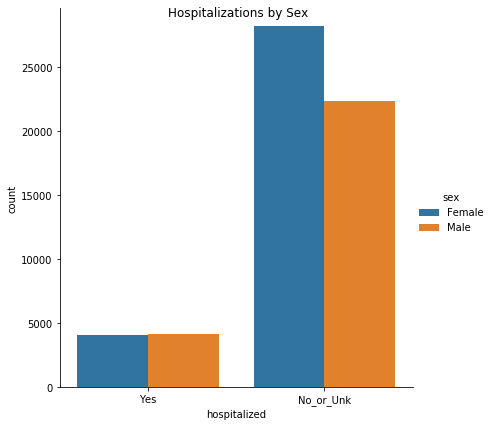

In [25]:
hosp_sex_plot = sns.catplot(x = "hospitalized", y = "count", hue = "sex", data=hosp_sex, kind = "bar", height=6)
hosp_sex_plot.fig.suptitle('Hospitalizations by Sex')
plt.show()

### Deaths by Age/Sex

In [26]:
deaths_age

,cartodb_id,the_geom,the_geom_webmercator,gender,age,count,etl_timestamp
0,1,None,None,Male,20-34,10,2020-11-20T18:20:02Z
1,2,None,None,Male,35-54,92,2020-11-20T18:20:02Z
2,3,None,None,Female,55-74,297,2020-11-20T18:20:02Z
3,4,None,None,Female,75+,604,2020-11-20T18:20:02Z
4,5,None,None,Male,55-74,424,2020-11-20T18:20:02Z
5,6,None,None,Female,35-54,45,2020-11-20T18:20:02Z
6,7,None,None,Male,75+,473,2020-11-20T18:20:02Z


In [27]:
# No entries for 'Female' 'Age = 20-34'. Perhaps no such cases at this time in Philadelphia? Seems hard to believe.
deaths_age.sort_values('age')

,cartodb_id,the_geom,the_geom_webmercator,gender,age,count,etl_timestamp
0,1,None,None,Male,20-34,10,2020-11-20T18:20:02Z
1,2,None,None,Male,35-54,92,2020-11-20T18:20:02Z
5,6,None,None,Female,35-54,45,2020-11-20T18:20:02Z
2,3,None,None,Female,55-74,297,2020-11-20T18:20:02Z
4,5,None,None,Male,55-74,424,2020-11-20T18:20:02Z
3,4,None,None,Female,75+,604,2020-11-20T18:20:02Z
6,7,None,None,Male,75+,473,2020-11-20T18:20:02Z


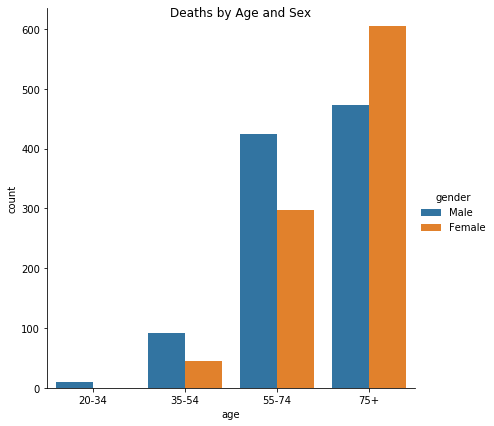

In [28]:
age_plot = sns.catplot(x = "age", y = "count", hue = "gender", data=deaths_age, kind = "bar", height=6)
age_plot.fig.suptitle('Deaths by Age and Sex')
plt.show()

__________________

## Cases by Race

In [29]:
cases_race

,cartodb_id,the_geom,the_geom_webmercator,racial_identity,count,etl_timestamp
0,1,None,None,White,12946,2020-11-20T18:20:02Z
1,2,None,None,AMERICAN INDIAN,1,2020-11-20T18:20:02Z
2,3,None,None,None,9370,2020-11-20T18:20:02Z
3,4,None,None,OTHER,3117,2020-11-20T18:20:02Z
4,5,None,None,DECLINE,1,2020-11-20T18:20:02Z
5,6,None,None,African,9,2020-11-20T18:20:02Z
6,7,None,None,Pacific Islander,32,2020-11-20T18:20:02Z
7,8,None,None,Native American,62,2020-11-20T18:20:02Z
8,9,None,None,UNKNOWN,574,2020-11-20T18:20:02Z
9,10,None,None,Asian,2199,2020-11-20T18:20:02Z


In [30]:
# We'll combine the 'None', and 'DECLINE' with ' UNKNOWN'
# Sort the responses by count and reset the index
cases_race['count'][8] = (cases_race['count'][4] + cases_race['count'][2] + cases_race['count'][8])
cases_race.drop([2,4], inplace=True)
cases_race = cases_race.sort_values('count', ascending=False)
cases_race = cases_race.reset_index(drop=True)

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Fix 'racial_identity' casing inconsitencies.
cases_race['racial_identity'] = cases_race['racial_identity'].str.title()

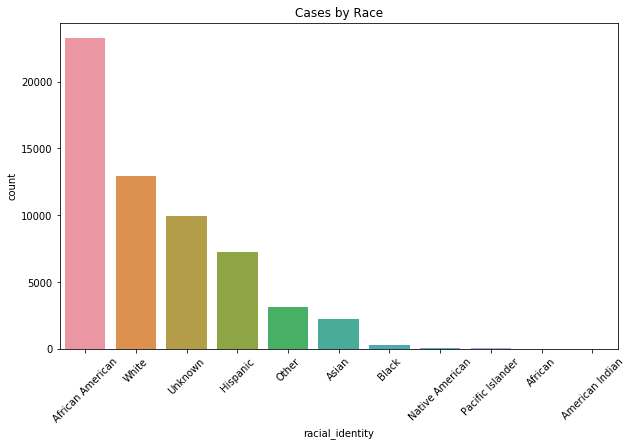

In [32]:
races = [i for i in cases_race['racial_identity']]
plt.figure(figsize=(10,6))
plt.title('Cases by Race')
case_race_plot = sns.barplot(x='racial_identity', y='count', data=cases_race)
case_race_plot.set_xticklabels(races, rotation=45)
plt.show()

In [33]:
# Show percentage of cases by Race
cases_race_perc = []
for i in cases_race['count']:
    cases_race_perc.append(round(i / cases_race['count'].sum(),4))

cases_race['percent_of_total_cases'] = cases_race_perc
cases_race[['racial_identity', 'percent_of_total_cases']]

,racial_identity,percent_of_total_cases
0,African American,0.3934
1,White,0.2191
2,Unknown,0.1683
3,Hispanic,0.1220
4,Other,0.0528
5,Asian,0.0372
6,Black,0.0053
7,Native American,0.0010
8,Pacific Islander,0.0005
9,African,0.0002


## Hospitalizations by Race

In [34]:
hosp_race

,cartodb_id,the_geom,the_geom_webmercator,racial_identity,hospitalized,count,etl_timestamp
0,1,None,None,HISPANIC,Yes,1238,2020-11-20T18:20:02Z
1,2,None,None,White,Yes,1549,2020-11-20T18:20:02Z
2,3,None,None,UNKNOWN,NO_UNKNOWN,502,2020-11-20T18:20:02Z
3,4,None,None,Native American,NO_UNKNOWN,57,2020-11-20T18:20:02Z
4,5,None,None,Asian,NO_UNKNOWN,1882,2020-11-20T18:20:02Z
5,6,None,None,AFRICAN AMERICAN,NO_UNKNOWN,18994,2020-11-20T18:20:02Z
6,7,None,None,WHITE,NO_UNKNOWN,11397,2020-11-20T18:20:02Z
7,8,None,None,UNKNOWN,Yes,72,2020-11-20T18:20:02Z
8,9,None,None,AFRICAN AMERICAN,Yes,4566,2020-11-20T18:20:02Z
9,10,None,None,None,Yes,103,2020-11-20T18:20:02Z


In [35]:
# Fix cases inconsitencies
hosp_race['racial_identity'] = hosp_race['racial_identity'].str.title()
# Make 'NO_UNKNOWN' more presentable with 'No_or_Unk'
hosp_race.loc[hosp_race['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

In [36]:
# Combine the NaNs with 'UNKNOWN' and confirm total count is the same before and after.
# Sort the responses by count and reset the index
print('Before edits =', hosp_race['count'].sum())
hosp_race['count'][2] = (hosp_race['count'][2] + hosp_race['count'][10] + hosp_race['count'][14])
hosp_race['count'][7] = (hosp_race['count'][7] + hosp_race['count'][9])
hosp_race.drop([9,10,14], inplace=True)
hosp_race = hosp_race.sort_values('count', ascending=False)
hosp_race = hosp_race.reset_index(drop=True)
print('After edits =', hosp_race['count'].sum())

Before edits = 59081
After edits = 59081


/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
hosp_race

,cartodb_id,the_geom,the_geom_webmercator,racial_identity,hospitalized,count,etl_timestamp
0,6,None,None,African American,No_or_Unk,18994,2020-11-20T18:20:02Z
1,7,None,None,White,No_or_Unk,11397,2020-11-20T18:20:02Z
2,3,None,None,Unknown,No_or_Unk,9770,2020-11-20T18:20:02Z
3,13,None,None,Hispanic,No_or_Unk,5972,2020-11-20T18:20:02Z
4,9,None,None,African American,Yes,4566,2020-11-20T18:20:02Z
5,20,None,None,Other,No_or_Unk,2784,2020-11-20T18:20:02Z
6,5,None,None,Asian,No_or_Unk,1882,2020-11-20T18:20:02Z
7,2,None,None,White,Yes,1549,2020-11-20T18:20:02Z
8,1,None,None,Hispanic,Yes,1238,2020-11-20T18:20:02Z
9,18,None,None,Other,Yes,342,2020-11-20T18:20:02Z


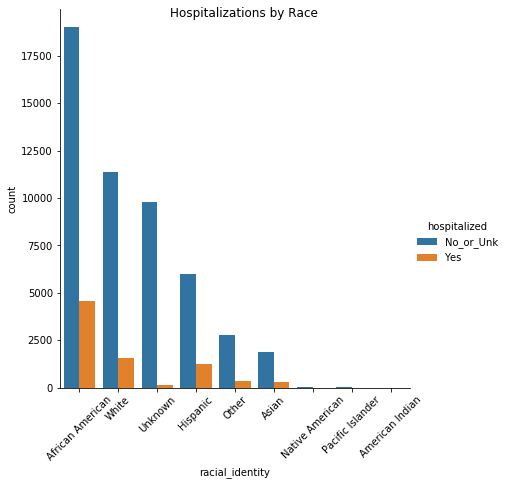

In [38]:
hosp_race_plot = sns.catplot(x = "racial_identity", y = "count", hue = "hospitalized", data=hosp_race,
                             kind = "bar", height=6)
hosp_race_plot.fig.suptitle('Hospitalizations by Race')
hosp_race_plot.set_xticklabels(rotation=45)
plt.show()

## Deaths by Race

In [39]:
deaths_race

,cartodb_id,the_geom,the_geom_webmercator,racial_identity,count,etl_timestamp
0,1,None,None,None,92,2020-11-20T18:20:02Z
1,2,None,None,Asian,68,2020-11-20T18:20:02Z
2,3,None,None,UNKNOWN,33,2020-11-20T18:20:02Z
3,4,None,None,AFRICAN AMERICAN,952,2020-11-20T18:20:02Z
4,5,None,None,Other,54,2020-11-20T18:20:02Z
5,6,None,None,HISPANIC,180,2020-11-20T18:20:02Z
6,7,None,None,White,570,2020-11-20T18:20:02Z


In [40]:
# No real explanation for 'NaN' row here, we'll just combine 'UNKNOWN' with NaN row.
# Fix 'racial_identity' casing inconsitencies.
# Sort the responses by count and reset the index
deaths_race['racial_identity'] = deaths_race['racial_identity'].str.title()
deaths_race['count'][2] = (deaths_race['count'][2] + deaths_race['count'][0])
deaths_race.drop([0], inplace=True)
deaths_race = deaths_race.sort_values('count', ascending=False)
deaths_race = deaths_race.reset_index(drop=True)
deaths_race

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,cartodb_id,the_geom,the_geom_webmercator,racial_identity,count,etl_timestamp
0,4,None,None,African American,952,2020-11-20T18:20:02Z
1,7,None,None,White,570,2020-11-20T18:20:02Z
2,6,None,None,Hispanic,180,2020-11-20T18:20:02Z
3,3,None,None,Unknown,125,2020-11-20T18:20:02Z
4,2,None,None,Asian,68,2020-11-20T18:20:02Z
5,5,None,None,Other,54,2020-11-20T18:20:02Z


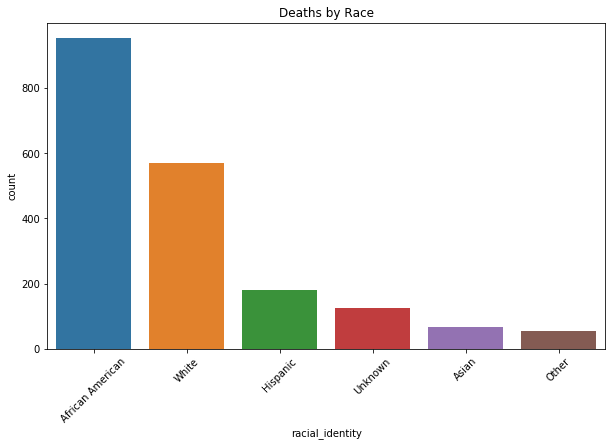

In [41]:
races = [i for i in deaths_race['racial_identity']]
plt.figure(figsize=(10,6))
plt.title('Deaths by Race')
race_plot = sns.barplot(x='racial_identity', y='count', data=deaths_race)
race_plot.set_xticklabels(races, rotation=45)
plt.show()

----------------

## Cases by Date

In [42]:
cases_date

,cartodb_id,the_geom,the_geom_webmercator,collection_date,count,test_result,etl_timestamp
0,1,None,None,2020-10-10T00:00:00Z,4627,negative,2020-11-20T18:20:02Z
1,2,None,None,2020-05-24T00:00:00Z,98,positive,2020-11-20T18:20:02Z
2,3,None,None,2020-06-06T00:00:00Z,1319,negative,2020-11-20T18:20:02Z
3,4,None,None,2020-09-27T00:00:00Z,80,positive,2020-11-20T18:20:02Z
4,5,None,None,2020-11-03T00:00:00Z,614,positive,2020-11-20T18:20:02Z
...,...,...,...,...,...,...,...
507,508,None,None,2020-03-21T00:00:00Z,188,negative,2020-11-20T18:20:02Z
508,509,None,None,2020-09-05T00:00:00Z,69,positive,2020-11-20T18:20:02Z
509,510,None,None,2020-04-25T00:00:00Z,959,negative,2020-11-20T18:20:02Z
510,511,None,None,2020-03-14T00:00:00Z,14,positive,2020-11-20T18:20:02Z


In [43]:
cases_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cartodb_id            512 non-null    int64 
 1   the_geom              0 non-null      object
 2   the_geom_webmercator  0 non-null      object
 3   collection_date       512 non-null    object
 4   count                 512 non-null    int64 
 5   test_result           512 non-null    object
 6   etl_timestamp         512 non-null    object
dtypes: int64(2), object(5)
memory usage: 28.1+ KB


In [44]:
# Remove 'T00:00:00Z' from 'collection_date'
cases_date['collection_date'] =  [re.sub('T(.*?)Z','', str(x)) for x in cases_date['collection_date']]

In [45]:
cases_date

,cartodb_id,the_geom,the_geom_webmercator,collection_date,count,test_result,etl_timestamp
0,1,None,None,2020-10-10,4627,negative,2020-11-20T18:20:02Z
1,2,None,None,2020-05-24,98,positive,2020-11-20T18:20:02Z
2,3,None,None,2020-06-06,1319,negative,2020-11-20T18:20:02Z
3,4,None,None,2020-09-27,80,positive,2020-11-20T18:20:02Z
4,5,None,None,2020-11-03,614,positive,2020-11-20T18:20:02Z
...,...,...,...,...,...,...,...
507,508,None,None,2020-03-21,188,negative,2020-11-20T18:20:02Z
508,509,None,None,2020-09-05,69,positive,2020-11-20T18:20:02Z
509,510,None,None,2020-04-25,959,negative,2020-11-20T18:20:02Z
510,511,None,None,2020-03-14,14,positive,2020-11-20T18:20:02Z


In [46]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in cases_date['collection_date']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)
    
month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

cases_date['month'] = month_names

new_cases_date = cases_date.groupby(['month', 'test_result'], as_index=False).sum()
new_cases_date.drop(['cartodb_id'], axis=1, inplace=True)
new_cases_date

,month,test_result,count
0,Apr,negative,28825
1,Apr,positive,12911
2,Aug,negative,103596
3,Aug,positive,3640
4,Jul,negative,89972
5,Jul,positive,4316
6,Jun,negative,63332
7,Jun,positive,3477
8,Mar,negative,7716
9,Mar,positive,3202


In [47]:
# Set and reorder months
months_order = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
new_cases_date['month'] = pd.Categorical(new_cases_date['month'], categories=months_order, ordered=True)

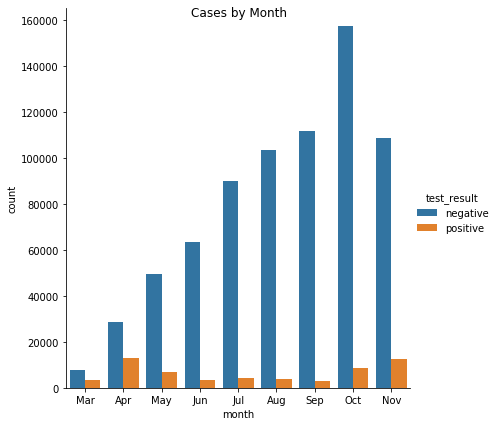

In [48]:
cases_date_plot = sns.catplot(x = "month", y = "count", hue = "test_result", data=new_cases_date, kind = "bar", height=6)
cases_date_plot.fig.suptitle('Cases by Month')
plt.show()

## Hospitalizations by Date

In [49]:
hosp_date

,cartodb_id,the_geom,the_geom_webmercator,date,hospitalized,count,etl_timestamp
0,1,None,None,2020-10-21T00:00:00Z,NO_UNKNOWN,311,2020-11-20T18:20:02Z
1,2,None,None,2020-06-01T00:00:00Z,NO_UNKNOWN,72,2020-11-20T18:20:02Z
2,3,None,None,2020-10-30T00:00:00Z,Yes,18,2020-11-20T18:20:02Z
3,4,None,None,2020-06-04T00:00:00Z,Yes,23,2020-11-20T18:20:02Z
4,5,None,None,2020-04-10T00:00:00Z,NO_UNKNOWN,449,2020-11-20T18:20:02Z
...,...,...,...,...,...,...,...
480,481,None,None,2020-06-26T00:00:00Z,NO_UNKNOWN,73,2020-11-20T18:20:02Z
481,482,None,None,2020-08-23T00:00:00Z,Yes,8,2020-11-20T18:20:02Z
482,483,None,None,2020-05-20T00:00:00Z,NO_UNKNOWN,174,2020-11-20T18:20:02Z
483,484,None,None,2020-04-24T00:00:00Z,Yes,107,2020-11-20T18:20:02Z


In [50]:
hosp_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cartodb_id            485 non-null    int64 
 1   the_geom              0 non-null      object
 2   the_geom_webmercator  0 non-null      object
 3   date                  483 non-null    object
 4   hospitalized          485 non-null    object
 5   count                 485 non-null    int64 
 6   etl_timestamp         485 non-null    object
dtypes: int64(2), object(5)
memory usage: 26.6+ KB


In [51]:
hosp_date.sort_values('date') # Sorting shows the NaN, and tells us where the dataset ends and begins.
                              # We'll just assume these NaNs come from dates prior to data collection, 
                              # and thus give them the date '2020-03-01'.

,cartodb_id,the_geom,the_geom_webmercator,date,hospitalized,count,etl_timestamp
318,319,None,None,2020-03-14T00:00:00Z,NO_UNKNOWN,5,2020-11-20T18:20:02Z
40,41,None,None,2020-03-17T00:00:00Z,NO_UNKNOWN,13,2020-11-20T18:20:02Z
65,66,None,None,2020-03-18T00:00:00Z,NO_UNKNOWN,7,2020-11-20T18:20:02Z
124,125,None,None,2020-03-19T00:00:00Z,NO_UNKNOWN,27,2020-11-20T18:20:02Z
170,171,None,None,2020-03-19T00:00:00Z,Yes,5,2020-11-20T18:20:02Z
...,...,...,...,...,...,...,...
142,143,None,None,2020-11-17T00:00:00Z,NO_UNKNOWN,930,2020-11-20T18:20:02Z
433,434,None,None,2020-11-18T00:00:00Z,NO_UNKNOWN,688,2020-11-20T18:20:02Z
306,307,None,None,2020-11-19T00:00:00Z,NO_UNKNOWN,368,2020-11-20T18:20:02Z
166,167,None,None,None,Yes,28,2020-11-20T18:20:02Z


In [52]:
# Remove 'T00:00:00Z' from 'date'
hosp_date['date'] =  [re.sub('T(.*?)Z','', str(x)) for x in hosp_date['date']]

In [53]:
# Replace 'None' with '2020-03-01'
for i in range(0, len(hosp_date['date'])):
    if hosp_date['date'][i] == 'None':
        hosp_date['date'][i] = '2020-03-01'

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in hosp_date['date']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)

month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

hosp_date['month'] = month_names

new_hosp_date = hosp_date.groupby(['month', 'hospitalized'], as_index=False).sum()

new_hosp_date.loc[new_hosp_date['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'
new_hosp_date

,month,hospitalized,cartodb_id,count
0,Apr,No_or_Unk,6472,10251
1,Apr,Yes,7106,3586
2,Aug,No_or_Unk,7694,3365
3,Aug,Yes,7573,334
4,Jul,No_or_Unk,6978,3780
5,Jul,Yes,8558,520
6,Jun,No_or_Unk,7025,2746
7,Jun,Yes,6307,559
8,Mar,No_or_Unk,2965,1780
9,Mar,Yes,3315,532


In [55]:
# Set and reorder months
new_hosp_date['month'] = pd.Categorical(new_hosp_date['month'], categories=months_order, ordered=True)

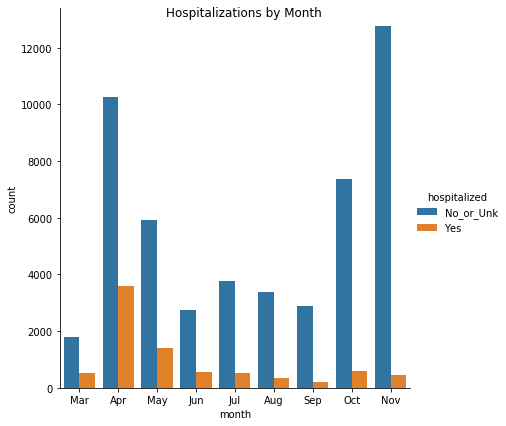

In [56]:
hosp_date_plot = sns.catplot(x = "month", y = "count", hue = "hospitalized", data=new_hosp_date, kind = "bar", height=6)
hosp_date_plot.fig.suptitle('Hospitalizations by Month')
plt.show()

## Deaths by Date

In [57]:
deaths_date

,cartodb_id,the_geom,the_geom_webmercator,clinical_date_of_death,covid_outcome,count,etl_timestamp
0,1,None,None,2020-06-16T00:00:00Z,DIED,6,2020-11-20T18:20:02Z
1,2,None,None,2020-05-25T00:00:00Z,DIED,13,2020-11-20T18:20:02Z
2,3,None,None,2020-06-09T00:00:00Z,DIED,6,2020-11-20T18:20:02Z
3,4,None,None,2020-05-03T00:00:00Z,DIED,25,2020-11-20T18:20:02Z
4,5,None,None,2020-06-13T00:00:00Z,DIED,7,2020-11-20T18:20:02Z
...,...,...,...,...,...,...,...
74,75,None,None,2020-05-20T00:00:00Z,DIED,14,2020-11-20T18:20:02Z
75,76,None,None,2020-05-21T00:00:00Z,DIED,10,2020-11-20T18:20:02Z
76,77,None,None,2020-04-08T00:00:00Z,DIED,26,2020-11-20T18:20:02Z
77,78,None,None,2020-05-24T00:00:00Z,DIED,8,2020-11-20T18:20:02Z


In [58]:
deaths_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cartodb_id              79 non-null     int64 
 1   the_geom                0 non-null      object
 2   the_geom_webmercator    0 non-null      object
 3   clinical_date_of_death  78 non-null     object
 4   covid_outcome           79 non-null     object
 5   count                   79 non-null     int64 
 6   etl_timestamp           79 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.4+ KB


In [59]:
# It appears that this data starts April 1st, 2020. Given that there is an NaN in the data, 
# I'm going to assume that those deaths are from March; I will fill this NaN with '2020-03-31'.
deaths_date['clinical_date_of_death'].fillna('2020-03-31', inplace=True)

In [60]:
# Remove 'T00:00:00Z' from 'clinical_date_of_death'
deaths_date['clinical_date_of_death'] =  [re.sub('T(.*?)Z','', str(x)) for x in deaths_date['clinical_date_of_death']]

In [61]:
# Add months to the data set and group by month to get a month by month analysis.
months = []
for i in deaths_date['clinical_date_of_death']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d").month)

month_names = []
for i in months:
    month_names.append(calendar.month_abbr[i])

deaths_date['month'] = month_names

month_df = deaths_date.groupby('month', as_index=False).sum()
month_df

,month,cartodb_id,count
0,Apr,1259,925
1,Aug,40,6
2,Jul,36,6
3,Jun,589,125
4,Mar,21,14
5,May,1170,530
6,Nov,45,8


In [62]:
# Set and reorder months
months_order = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Nov']
month_df['month'] = pd.Categorical(month_df['month'], categories=months_order, ordered=True)

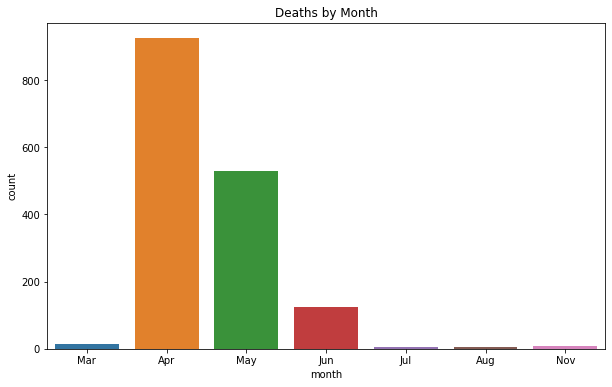

In [64]:
plt.figure(figsize=(10,6))
plt.title('Deaths by Month')
date_plot = sns.barplot(x='month', y='count', data=month_df)
plt.show()

In [65]:
print('Age data total deaths =', deaths_age['count'].sum())
print('Race data total deaths =', deaths_race['count'].sum())
print('Date data total deaths =', deaths_date['count'].sum())

Age data total deaths = 1945
Race data total deaths = 1949
Date data total deaths = 1614


Some discrepencies in the total death counts. Perhaps related to data collection issues?